In [62]:
import sys

import pandas as pd
import numpy as np
import load_data
import warnings
warnings.filterwarnings('ignore')
import importlib
importlib.reload(load_data)

<module 'load_data' from '/Users/kunjshah/Downloads/BTC_Mining_Project/load_data.py'>

In [2]:
"""
Bitcoin Mining: Solve complex puzzles to validate transactions and add them to blockchain

puzzles involve computing SHA-256 Hashes over and over

1 Hash = 1 attempt to solve the puzzle

Hashrate = number of hashes/second


Antminer = 110 TH/s which is 110 trillion guesses per second

More hashrate = more revenue but more electricity usage


"""

'\nBitcoin Mining: Solve complex puzzles to validate transactions and add them to blockchain\n\npuzzles involve computing SHA-256 Hashes over and over\n\n1 Hash = 1 attempt to solve the puzzle\n\nHashrate = number of hashes/second\n\n\nAntminer = 110 TH/s which is 110 trillion guesses per second\n\nMore hashrate = more revenue but more electricity usage\n\n\n'

In [3]:
da = load_data.NSP_NW_da_data() #hr

In [4]:
rt = load_data.NSP_NW_rt_data() #5min

In [5]:
btc = load_data.btc_data(time = 'hourly')

In [59]:
def calc_breakeven(btc_price):
    watts =3250
    watt_to_megawatt = 1000000
    hours = 24
    megawatt_per_hour = watts * hours / watt_to_megawatt
    #print(f"MWH: {megawatt_per_hour}")
    btc_gen= 0.00008 #per day,
    dv = btc_price* btc_gen
    #print(f"Dollar Value: {dv}")
    breakeven = dv/ megawatt_per_hour
    return breakeven

In [66]:
current_breakeven = calc_breakeven(93_000)
print(current_breakeven)

95.38461538461539


In [16]:
#align columns

#first try comparing da and btc

def algin_columns_btc():

    btc = load_data.btc_data(time = 'hourly')[['price_close']]
    da = load_data.NSP_NW_da_data()

    btc.rename(columns = {'price_close':'btc'}, inplace = True)


    rt = load_data.NSP_NW_rt_data()

    dadf = da.copy()
    rtdf = rt.copy()

    rtdf = rt[['interval_end_local', 'lmp']]

    dadf = da[['interval_end_local', 'lmp']]

    rtdf.rename(columns={'interval_end_local':'date', 'lmp':'rt'}, inplace = True)
    dadf.rename(columns={'interval_end_local': 'date', 'lmp':'da'}, inplace=True)

    dadf.set_index('date', inplace=True)
    rtdf.set_index('date', inplace=True)



    merged = pd.merge(dadf, btc, left_index=True, right_index=True)

    return merged








In [17]:
dabtc = algin_columns_btc()

In [18]:
dabtc.index

DatetimeIndex(['2021-01-01 06:00:00+00:00', '2021-01-01 07:00:00+00:00',
               '2021-01-01 08:00:00+00:00', '2021-01-01 09:00:00+00:00',
               '2021-01-01 10:00:00+00:00', '2021-01-01 11:00:00+00:00',
               '2021-01-01 12:00:00+00:00', '2021-01-01 13:00:00+00:00',
               '2021-01-01 14:00:00+00:00', '2021-01-01 15:00:00+00:00',
               ...
               '2025-02-25 15:00:00+00:00', '2025-02-25 16:00:00+00:00',
               '2025-02-25 17:00:00+00:00', '2025-02-25 18:00:00+00:00',
               '2025-02-25 19:00:00+00:00', '2025-02-25 20:00:00+00:00',
               '2025-02-25 21:00:00+00:00', '2025-02-25 22:00:00+00:00',
               '2025-02-25 23:00:00+00:00', '2025-02-26 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=36003, freq=None)

In [37]:
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
dabtc['date_to_use'] = dabtc.index + timedelta(days=1)
dabtc['date_to_use'] = dabtc['date_to_use'].dt.date

#make decision

In [38]:



#buy day ahead energy 6:00: $17.20/MwH

#use it after 12:00 am the next day ebtween 12:00 am - 11:59PM

#Assumption:
# price of btc today is the best predictor for price of btc tomorrow



#T





























,da,btc,date_to_use
2021-01-01 06:00:00+00:00,17.20,29240.79,2021-01-02
2021-01-01 07:00:00+00:00,17.22,29233.94,2021-01-02
2021-01-01 08:00:00+00:00,17.08,29166.41,2021-01-02
2021-01-01 09:00:00+00:00,17.69,29074.87,2021-01-02
2021-01-01 10:00:00+00:00,18.03,29280.43,2021-01-02
...,...,...,...
2025-02-25 20:00:00+00:00,25.34,87825.05,2025-02-26
2025-02-25 21:00:00+00:00,27.55,88044.47,2025-02-26
2025-02-25 22:00:00+00:00,26.08,88706.81,2025-02-26
2025-02-25 23:00:00+00:00,37.10,88740.03,2025-02-26


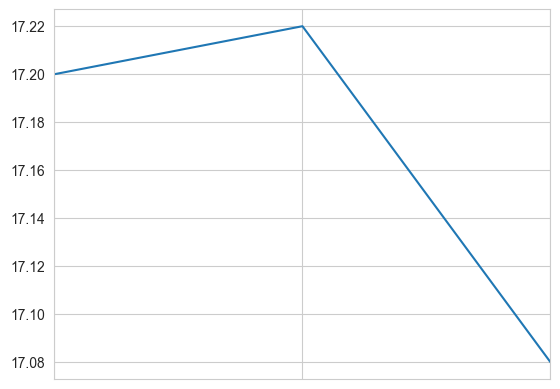

In [35]:
sample = dabtc[:'2021-01-01 08']

sample.da.plot()
plt.show()

In [86]:
#Assumption


#day ahead
watts = 3250
watt_to_megawatt = 1_000_000
megawatt_to_megwatt_hour = 24
btc_gen= 0.00008 #per day,
scale = 1000
#da is in mwh
                        #electricity needed                                     #cost of electricity
dabtc['elec_cost'] =  (((watts / watt_to_megawatt) * megawatt_to_megwatt_hour) * dabtc['da'])   #in dollars

btc_per_hour = btc_gen / 24 #hour

# Step 1: Create a new column of just the date (drop time) from the index
dabtc['btc_date'] = dabtc.index.date

# Step 2: Group by date and calculate average BTC price
btc_daily_avg = dabtc.groupby('btc_date')['btc'].mean()

# Step 3: Map tomorrow's average BTC price to the current row using 'date_to_use'
dabtc['btc_price_tomorrow'] = dabtc['date_to_use'].map(btc_daily_avg.to_dict())

"""
revisit to see if better than average

"""





                                    #btcusd this is in T-1 but we need T
dabtc['btc_rev'] = btc_per_hour * dabtc['btc_price_tomorrow']  #dollars


dabtc['signal']= np.where(dabtc['elec_cost'] < dabtc['btc_rev'], 1, 0)



dabtc['profit'] = ((dabtc['btc_rev'] - dabtc['elec_cost'])*dabtc['signal']) * scale


#pull data for derivative markets


In [87]:
dabtc['cumulative_profit'] = dabtc['profit'].cumsum()

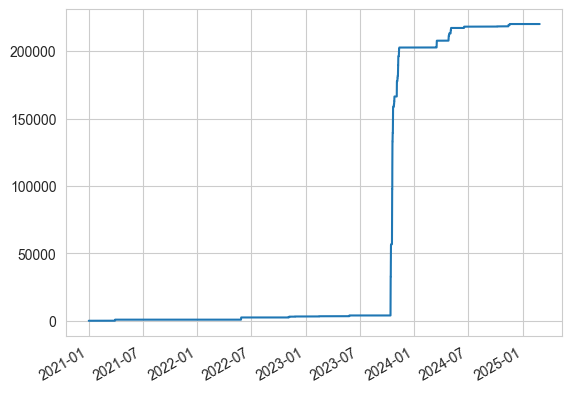

In [88]:
dabtc.cumulative_profit.plot()
plt.show()


In [90]:
dabtc.signal.value_counts()

signal
0    35813
1      190
Name: count, dtype: int64

In [251]:
da_btc

#so we currently we are calculating the decison to buy energy based on the the btc price from today to buy energy for tomorrow (btc price today is the best prediction for tomorrow)

#our

,da,btc,break_even,signal
2021-01-01 06:00:00+00:00,17.20,29240.79,29.990554,1
2021-01-01 07:00:00+00:00,17.22,29233.94,29.983528,1
2021-01-01 08:00:00+00:00,17.08,29166.41,29.914267,1
2021-01-01 09:00:00+00:00,17.69,29074.87,29.820379,1
2021-01-01 10:00:00+00:00,18.03,29280.43,30.031210,1
...,...,...,...,...
2025-02-25 20:00:00+00:00,25.34,87825.05,90.076974,1
2025-02-25 21:00:00+00:00,27.55,88044.47,90.302021,1
2025-02-25 22:00:00+00:00,26.08,88706.81,90.981344,1
2025-02-25 23:00:00+00:00,37.10,88740.03,91.015415,1


In [252]:
da_btc['break_even'] = da_btc['btc'].apply(calc_breakeven)

#breakeven is in $/MwhH

In [43]:
def align_rt():
    # Load 5-min Real-Time prices
    rt = load_data.NSP_NW_rt_data()
    rt = rt[['interval_end_local', 'lmp']]
    rt.rename(columns={'interval_end_local': 'datetime', 'lmp': 'rt'}, inplace=True)
    rt.set_index('datetime', inplace=True)
    rt = rt.sort_index()

    # Load hourly BTC & DA prices
    da_btc = algin_columns_btc()
    da_btc = da_btc.sort_index()

    start = min(rt.index.min(), da_btc.index.min())
    end = max(rt.index.max(), da_btc.index.max()).tz_convert('UTC')
    full_5min_index = pd.date_range(start=start, end=end, freq='5T')

    # 2. Reindex hourly da_btc to 5-min with forward-fill
    da_btc_5min = da_btc.reindex(full_5min_index).ffill()

    # 3. Reindex rt to same 5-min index (or left-join)
    rt_5min = rt.reindex(full_5min_index)

    # 4. Combine
    merged = pd.concat([rt_5min, da_btc_5min], axis=1)

    # 5. Drop rows with missing values
    merged.dropna(inplace=True)
    merged = merged[:'2025-02']

    return merged

In [44]:
z = align_rt()

In [45]:
z

,rt,da,btc
2021-12-20 05:05:00+00:00,27.30,24.49,46987.06
2021-12-20 05:10:00+00:00,21.55,24.49,46987.06
2021-12-20 05:15:00+00:00,21.34,24.49,46987.06
2021-12-20 05:20:00+00:00,22.30,24.49,46987.06
2021-12-20 05:25:00+00:00,20.59,24.49,46987.06
...,...,...,...
2025-02-28 23:35:00+00:00,31.63,48.57,88677.45
2025-02-28 23:40:00+00:00,31.13,48.57,88677.45
2025-02-28 23:45:00+00:00,38.52,48.57,88677.45
2025-02-28 23:50:00+00:00,41.08,48.57,88677.45


In [46]:
z['profit']= 0

In [47]:
z = z.reset_index()

In [48]:
z.rename(columns={'index':'time',}, inplace=True)

In [49]:
z['time'] = pd.to_datetime(z['time'])

In [50]:
#using real time market


watts =3250
watt_to_megawatt = 1_000_000
megawatt_to_megwatt_hour = 24
btc_gen= 0.00008 #per day,
min_quantity = 1 # buy exact amount
scale = 1000
hour_to_min = 12
#da is in mwh

z['elec_cost'] =  (((watts / watt_to_megawatt) * megawatt_to_megwatt_hour) * z['rt'])/12   # $



btc_per_5min = btc_gen / 24/12

z['btc_rev'] = btc_per_5min * z['btc']

z['profit'] = ((z['btc_rev'] - z['elec_cost'])*z['signal']) * scale

# z['extra_energy'] = min_quantity - z['elec_cost']


KeyError: 'signal'

In [51]:
z

,time,rt,da,btc,profit,elec_cost,btc_rev
0,2021-12-20 05:05:00+00:00,27.30,24.49,46987.06,0,0.177450,0.013052
1,2021-12-20 05:10:00+00:00,21.55,24.49,46987.06,0,0.140075,0.013052
2,2021-12-20 05:15:00+00:00,21.34,24.49,46987.06,0,0.138710,0.013052
3,2021-12-20 05:20:00+00:00,22.30,24.49,46987.06,0,0.144950,0.013052
4,2021-12-20 05:25:00+00:00,20.59,24.49,46987.06,0,0.133835,0.013052
...,...,...,...,...,...,...,...
336030,2025-02-28 23:35:00+00:00,31.63,48.57,88677.45,0,0.205595,0.024633
336031,2025-02-28 23:40:00+00:00,31.13,48.57,88677.45,0,0.202345,0.024633
336032,2025-02-28 23:45:00+00:00,38.52,48.57,88677.45,0,0.250380,0.024633
336033,2025-02-28 23:50:00+00:00,41.08,48.57,88677.45,0,0.267020,0.024633


In [52]:
z['break_even'] = z['btc'].apply(calc_breakeven)
z['signal'] = np.where(z['btc_rev'] > z['elec_cost'], 1, 0)

In [53]:
z['signal'].value_counts()

signal
0    326649
1      9386
Name: count, dtype: int64

In [54]:
9386/326649 *100

2.873420705405496

In [55]:
z['cumulative_protfit'] = z['profit'].cumsum()

In [56]:
buy = z[z.signal ==1]

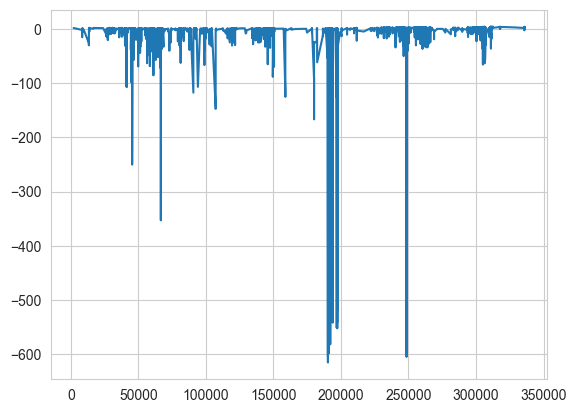

In [57]:
buy['rt'].plot()
plt.show()

In [58]:
buy['rt'].describe()

count    9386.000000
mean      -22.127155
std        72.233446
min      -615.130000
25%       -10.920000
50%        -3.750000
75%        -0.320000
max         4.230000
Name: rt, dtype: float64

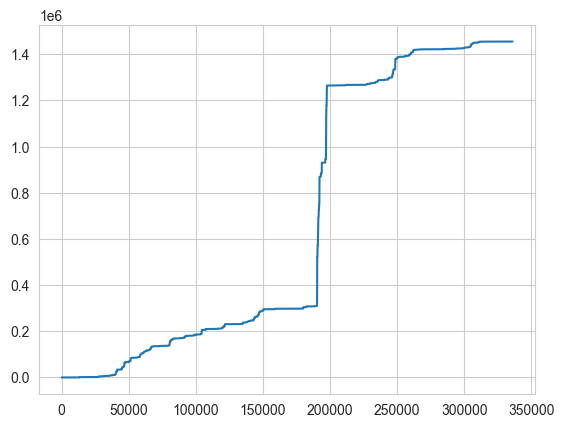

In [406]:
z['cumulative_protfit'].plot()
plt.show()

In [330]:
#for example

"""
the day we bought energy the btc price was justified above the breakeven
da>btc breakeven the next day

so we already bought 3.77






"""

'\nthe day we bought energy the btc price was justified above the breakeven\nda>btc breakeven the next day\n\nso we already bought 3.77\n\n\n\n\n\n\n'

In [168]:
"""
Questions to answer:

- Estimate BTC/USD Volatility

Strategy to be profitable?
- Forecast profits for July 2025 - June 2026
- Forecast some energy
- Location of facility
- Purchase power in DA and if not used sell in RT
- Or purchase less power in DA if need more buy in RT

"""

'\nQuestions to answer:\n\n- Estimate BTC/USD Volatility\n\nStrategy to be profitable?\n- Forecast profits for July 2025 - June 2026\n- Forecast some weather\n- Location of facility\n- Purchase power in DA and if not used sell in RT\n- Or purchase less power in DA if need more buy in RT\n\n'

In [94]:
np.sqrt(btc['price_close'].std()/4)

77.62854830374722

In [10]:
"""
Across 500 simulation what is the expected average annual excess profit (profit - rf rate)
- forecast energy prices for 1 year
- forecast btc prices for 1 year
-

What is the volatility in annual profitability
What is the sharpe


Would you buy the facility for 500k?
-Base this off of the return given the volatility of BTC versus electricity
- What is the breakeven expected value
"""

'\nAcross 500 simulation what is the expected average annual excess profit (profit - rf rate)\n- forecast energy prices for 1 year\n- forecast btc prices for 1 year\n-\n\nWhat is the volatility in annual profitability\nWhat is the sharpe\n\n\nWould you buy the facility for 500k?\n-Base this off of the return given the volatility of BTC versus electricity\n- What is the breakeven expected value\n'

In [11]:
"""
Intraday Analysis
- Choose an hourly intraday period as well as a shorter intraday period
- for reahc period what is the value of operating the BTC facility? What was the value of curtailment? What was the net payout?

-Model BTC and Electricity volatility surface


"""

'\nIntraday Analysis\n- Choose an hourly intraday period as well as a shorter intraday period\n- for reahc period what is the value of operating the BTC facility? What was the value of curtailment? What was the net payout?\n\n-Model BTC and Electricity volatility surface\n\n\n'

In [12]:
#part 2 change the node

In [13]:
# Per minerstat S19s pros consume 3250W of power to produce 110 TH/s and
# generate 0.00008 BTC per day giving them an approximate breakeven of
# $95/MWH at a BTC price of 93k

In [32]:
df_pred = pd.read_csv('btc_hourly_sim_45vol_20drift.csv', index_col=0)

In [33]:
df_pred.index = pd.to_datetime(df_pred.index)
df_pred = df_pred.resample('D').last()

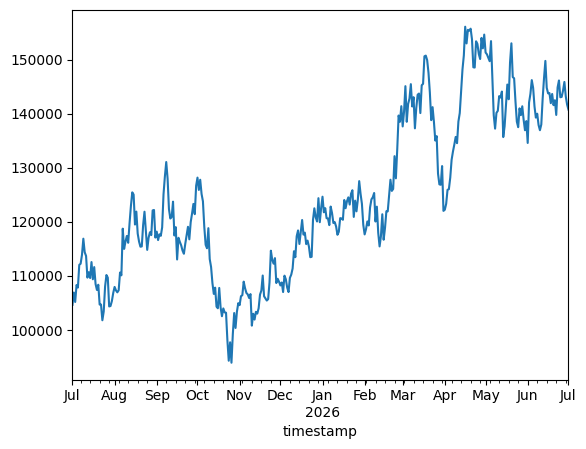

In [34]:
import matplotlib.pyplot as plt
df_pred['BTC_USD'].plot()
plt.show()